## Trabalho 1 (Lógica fuzzy)
### Aluno: Nicolas Cechinel Rosa
### Matrícula: 18104160

- [1. Introdução](#1.-Introdução)
- [2. Desenvolvimento](#2.-Desenvolvimento)
    - [2.1. Funções de pertinência](#2.1.-Funções-de-pertinência)
    - [2.2. Regras](#2.2.-Regras)
    - [2.3. Defuzzificação](#2.4.-Defuzzificação)
- [3. Conclusão](#3.-Conclusão)

## 1. Introdução

    O objetivo deste trabalho e implementar um ar condicionado baseado em regras fuzzy. O ar condicionado deve ser capaz de receber uma temperatura e umidade e um valor de energia o qual vai decidir o metodo de defuzzificacao e apos ira retornar uma temperatura de saída do ar condicionado.

## 2. Desenvolvimento
    
        Para o desenvolvimento deste trabalho foi utilizado a biblioteca scikit-fuzzy, que é uma biblioteca de lógica fuzzy de código aberto para Python. A biblioteca implementa uma variedade de sistemas de controle fuzzy e algoritmos de inferência fuzzy, além de fornecer ferramentas úteis para a modelagem e análise de sistemas de controle fuzzy.

### 2.1. Funções de pertinência

        Para o desenvolvimento deste trabalho foram utilizadas 3 funções de pertinência para cada variável de entrada e 3 funções de pertinência para a variável de saída. As funções de pertinência foram definidas da forma descrita no codigo abaixo.

```python
# Variáveis do problema
temp = ctrl.Antecedent(np.arange(-20, 50, 1), 'temperatura')
umidade = ctrl.Antecedent(np.arange(0, 100, 1), 'umidade')
ar_condicionado = ctrl.Consequent(np.arange(12, 35, 1), 'ar_condicionado')
energia = ctrl.Antecedent(np.arange(0, 100, 1), 'energia')
energia_out = ctrl.Consequent(np.arange(0, 100, 1), 'energia_out')

# Funções de pertinência temperatura
temp['muito_baixa'] = fuzz.trapmf(temp.universe, [-20, -20, -5, 0])
temp['baixa'] = fuzz.trimf(temp.universe, [-5, 10, 18])
temp['media'] = fuzz.trapmf(temp.universe, [15, 20, 25, 28])
temp['alta'] = fuzz.trimf(temp.universe, [25, 28, 39])
temp['muito_alta'] = fuzz.trapmf(temp.universe, [39, 45, 50, 50])
# Funções de pertinência umidade

umidade['baixa'] = fuzz.trimf(umidade.universe, [0, 0, 30])
umidade['media'] = fuzz.trapmf(umidade.universe, [25, 50, 80, 100])
umidade['alta'] = fuzz.trimf(umidade.universe, [80, 100, 100])

#Funções de pertinência ar_condicionado

ar_condicionado['resfriar2'] = fuzz.trimf(ar_condicionado.universe, [12, 12, 17])
ar_condicionado['resfriar1'] = fuzz.trimf(ar_condicionado.universe, [15, 18, 20])
ar_condicionado['desligar'] = fuzz.trimf(ar_condicionado.universe, [19, 22, 25])
ar_condicionado['aquecer1'] = fuzz.trimf(ar_condicionado.universe, [22, 25, 27])
ar_condicionado['aquecer2'] = fuzz.trapmf(ar_condicionado.universe, [25, 30, 35, 35])

# Funções de pertinência energia
energia['baixa'] = fuzz.trimf(energia.universe, [0, 0, 50])
energia['regular'] = fuzz.trimf(energia.universe, [0, 50, 100])
energia['alta'] = fuzz.trimf(energia.universe, [50, 100, 100])
energia_out['baixa'] = fuzz.trimf(energia_out.universe, [0, 0, 50])
energia_out['regular'] = fuzz.trimf(energia_out.universe, [0, 50, 100])
energia_out['alta'] = fuzz.trimf(energia_out.universe, [50, 100, 100])

```

### 2.2. Regras

        Para o desenvolvimento deste trabalho foram utilizadas 8 regras, que foram definidas da forma descrita no codigo abaixo.

```python

# regras de inferência

rule1 = ctrl.Rule(temp['muito_baixa'], ar_condicionado['aquecer2'])
rule2 = ctrl.Rule(temp['muito_alta'] or (temp['alta'] and umidade['alta']) , ar_condicionado['resfriar2'])
rule3 = ctrl.Rule((temp['media'] and umidade['media']) or umidade['baixa'] , ar_condicionado['desligar'])
rule4 = ctrl.Rule((temp['baixa'] and umidade['media']) or umidade['alta'] , ar_condicionado['aquecer1'])
rule5 = ctrl.Rule(temp['alta'], ar_condicionado['resfriar1'])
rule6 = ctrl.Rule(energia['alta'], energia_out['alta'])
rule7 = ctrl.Rule(energia['regular'], energia_out['regular'])
rule8 = ctrl.Rule(energia['baixa'], energia_out['baixa'])

```

### 2.3. Defuzzificação

        Para o desenvolvimento deste trabalho foi realizada uma verificacao para decisao do tipo de defuzzificacao a ser utilizada, que foi definida da forma descrita no codigo abaixo.
        
```python

# se energia for baixa defuzzifica com minima das maximas
if simulador2.output['energia_out'] == 'baixa':
    ar_condicionado.defuzzify_method = 'mom' # minima das maximas
elif simulador2.output['energia_out'] == 'regular':
    ar_condicionado.defuzzify_method = 'som'# media das maximas
else:
    ar_condicionado.defuzzify_method = 'lom' #maxima das maximas

```
### 2.4. Simulação e testes

        Para o desenvolvimento deste trabalho foi realizada uma simulação para cada regra, que foi definida da forma descrita no codigo abaixo.

```python

# simulação
# cria o simulador utilizando as regras de decisão
simulador_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
simulador = ctrl.ControlSystemSimulation(simulador_ctrl)
simulador_ctrl2 = ctrl.ControlSystem([rule6, rule7, rule8])
simulador2 = ctrl.ControlSystemSimulation(simulador_ctrl2)

# Entrando com alguns valores para temperatura e umidade e calculando o valor de ar_condicionado

simulador.input['temperatura'] = 30
simulador.input['umidade'] = 50
simulador2.input['energia'] = 50
simulador2.compute() # calculando o resultado de energia_outs

# se energia for baixa defuzzifica com minima das maximas
if simulador2.output['energia_out'] == 'baixa':
    ar_condicionado.defuzzify_method = 'mom'
elif simulador2.output['energia_out'] == 'regular':
    ar_condicionado.defuzzify_method = 'som'
else:
    ar_condicionado.defuzzify_method = 'lom'

simulador.compute() # calculando o resultado de ar_condicionado


RESULTADO =  simulador.output['ar_condicionado']  # valor de ar_condicionado

RESULTADO2 = simulador2.output['energia_out'] # valor de energia_out

ar_condicionado.view(sim=simulador) # visualizando o resultado
print(simulador.output['ar_condicionado']) # valor de ar_condicionado
energia_out.view(sim=simulador2) # visualizando o resultado
print(simulador2.output['energia_out']) # valor de energia_out

```
    Foram testados varios valores com objetivo de verificar as saidas do ar condicionado com base na defuzzificacao escolhida. Os valores de entrada e saida que foram testados estao descritos no codigo desse arquivo. Os resultados obtidos estao printados após a execução do codigo.



## 3. Conclusão

        O trabalho foi realizado com sucesso, onde foi possivel implementar um ar condicionado baseado em regras fuzzy. O ar condicionado foi capaz de receber uma temperatura e umidade e um valor de energia o qual vai decidir o metodo de defuzzificacao e apos ira retornar uma temperatura de saída do ar condicionado.


        

    


## Código fonte

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Variáveis do problema
temp = ctrl.Antecedent(np.arange(-20, 50, 1), 'temperatura')
umidade = ctrl.Antecedent(np.arange(0, 100, 1), 'umidade')
ar_condicionado = ctrl.Consequent(np.arange(12, 35, 1), 'ar_condicionado')
energia = ctrl.Antecedent(np.arange(0, 100, 1), 'energia')
energia_out = ctrl.Consequent(np.arange(0, 100, 1), 'energia_out')


In [ ]:
!pip install -U scikit-fuzzy

In [2]:
# Funções de pertinência energia
energia['baixa'] = fuzz.trimf(energia.universe, [0, 0, 50])
energia['regular'] = fuzz.trimf(energia.universe, [0, 50, 100])
energia['alta'] = fuzz.trimf(energia.universe, [50, 100, 100])

energia_out['baixa'] = fuzz.trimf(energia_out.universe, [0, 0, 50])
energia_out['regular'] = fuzz.trimf(energia_out.universe, [0, 50, 100])
energia_out['alta'] = fuzz.trimf(energia_out.universe, [50, 100, 100])


In [3]:
# Funções de pertinência temperatura
temp['muito_baixa'] = fuzz.trapmf(temp.universe, [-20, -20, -5, 0])
temp['baixa'] = fuzz.trimf(temp.universe, [-5, 10, 18])
temp['media'] = fuzz.trapmf(temp.universe, [15, 20, 25, 28])
temp['alta'] = fuzz.trimf(temp.universe, [25, 28, 39])
temp['muito_alta'] = fuzz.trapmf(temp.universe, [39, 45, 50, 50])

In [4]:
# Funções de pertinência umidade

umidade['baixa'] = fuzz.trimf(umidade.universe, [0, 0, 30])
umidade['media'] = fuzz.trapmf(umidade.universe, [25, 50, 80, 100])
umidade['alta'] = fuzz.trimf(umidade.universe, [80, 100, 100])

In [5]:
# Funções de pertinência ar_condicionado

ar_condicionado['resfriar2'] = fuzz.trimf(ar_condicionado.universe, [12, 12, 17])
ar_condicionado['resfriar1'] = fuzz.trimf(ar_condicionado.universe, [15, 18, 20])
ar_condicionado['desligar'] = fuzz.trimf(ar_condicionado.universe, [19, 22, 25])
ar_condicionado['aquecer1'] = fuzz.trimf(ar_condicionado.universe, [22, 25, 27])
ar_condicionado['aquecer2'] = fuzz.trapmf(ar_condicionado.universe, [25, 30, 35, 35])

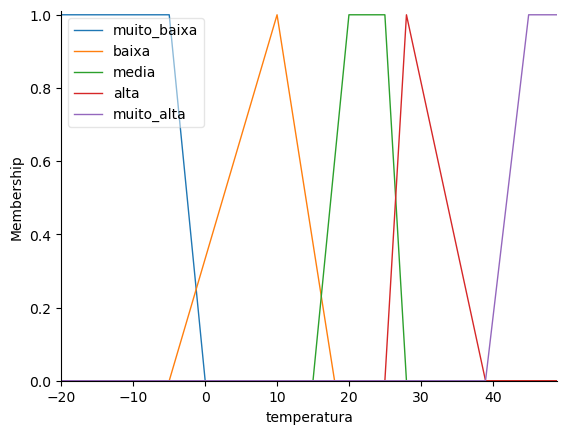

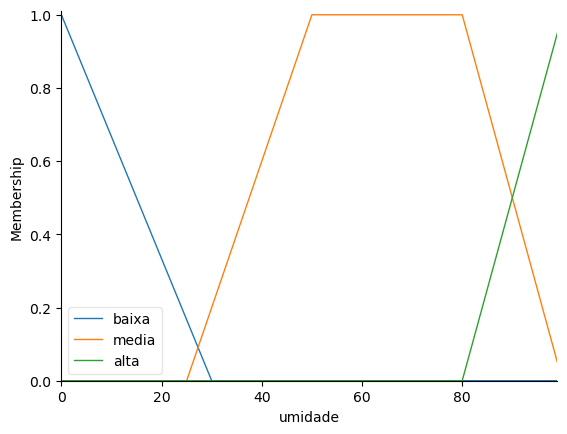

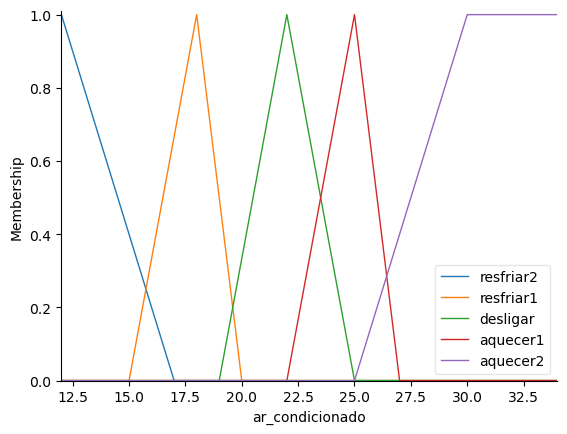

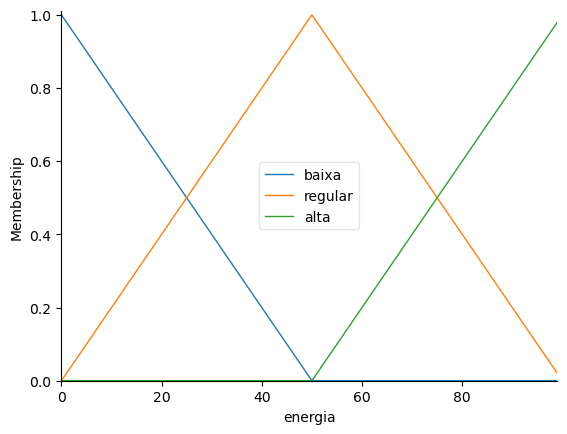

In [7]:
# Visualização das funções de pertinência:

temp.view()
umidade.view()
ar_condicionado.view()
energia.view()

In [8]:
# regras de inferência

rule1 = ctrl.Rule(temp['muito_baixa'], ar_condicionado['aquecer2'])
rule2 = ctrl.Rule(temp['muito_alta'] or (temp['alta'] and umidade['alta']) , ar_condicionado['resfriar2'])
rule3 = ctrl.Rule((temp['media'] and umidade['media']) or umidade['baixa'] , ar_condicionado['desligar'])
rule4 = ctrl.Rule((temp['baixa'] and umidade['media']) or umidade['alta'] , ar_condicionado['aquecer1'])
rule5 = ctrl.Rule(temp['alta'], ar_condicionado['resfriar1'])
rule6 = ctrl.Rule(energia['alta'], energia_out['alta'])
rule7 = ctrl.Rule(energia['regular'], energia_out['regular'])
rule8 = ctrl.Rule(energia['baixa'], energia_out['baixa'])

Energia alta e resfriar MOM
23.01243386243386
80.3809143009463


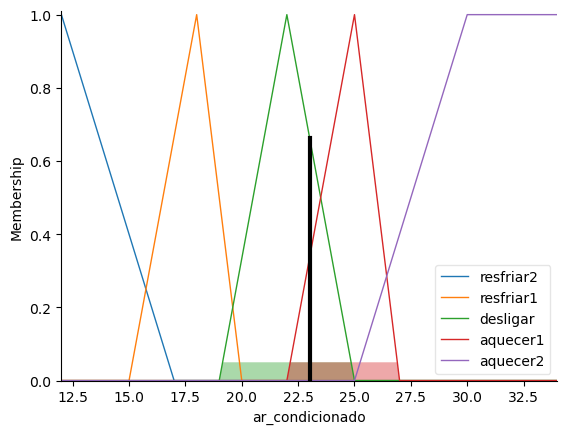

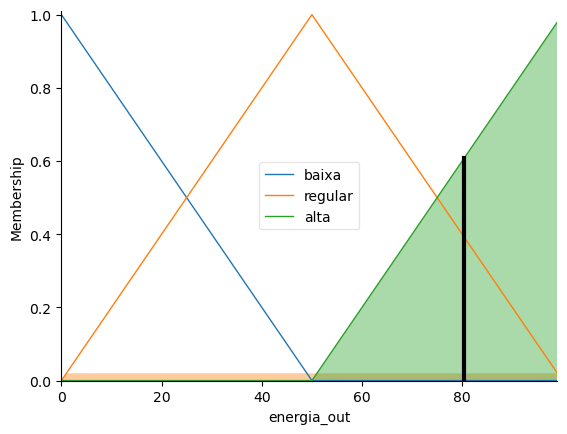

In [15]:
# cria o simulador utilizando as regras de decisão
simulador_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
simulador = ctrl.ControlSystemSimulation(simulador_ctrl)
simulador_ctrl2 = ctrl.ControlSystem([rule6, rule7, rule8])
simulador2 = ctrl.ControlSystemSimulation(simulador_ctrl2)

# Entrando com alguns valores para temperatura e umidade e calculando o valor de ar_condicionado

simulador.input['temperatura'] = 10
simulador.input['umidade'] = 100
simulador2.input['energia'] = 100
simulador2.compute() # calculando o resultado de energia_outs
simulador.compute() # calculando o resultado de ar_condicionado

RESULTADO =  simulador.output['ar_condicionado']  # valor de ar_condicionado
RESULTADO2 = simulador2.output['energia_out'] # valor de energia_out

#verificar a pertinência dos valores e tornar a saida string para facilitar a comparação
resfriar2 = fuzz.interp_membership(ar_condicionado.universe, ar_condicionado['resfriar2'].mf, RESULTADO)
resfriar1 = fuzz.interp_membership(ar_condicionado.universe, ar_condicionado['resfriar1'].mf, RESULTADO)
desligar = fuzz.interp_membership(ar_condicionado.universe, ar_condicionado['desligar'].mf, RESULTADO)
aquecer1 = fuzz.interp_membership(ar_condicionado.universe, ar_condicionado['aquecer1'].mf, RESULTADO)
aquecer2 = fuzz.interp_membership(ar_condicionado.universe, ar_condicionado['aquecer2'].mf, RESULTADO)
energia_baixa = fuzz.interp_membership(energia_out.universe, energia_out['baixa'].mf, RESULTADO2)
energia_regular = fuzz.interp_membership(energia_out.universe, energia_out['regular'].mf, RESULTADO2)
energia_alta = fuzz.interp_membership(energia_out.universe, energia_out['alta'].mf, RESULTADO2)

if resfriar2 > resfriar1 and resfriar2 > desligar and resfriar2 > aquecer1 and resfriar2 > aquecer2:
    simulador.output['ar_condicionado'] = 'resfriar2'
elif resfriar1 > resfriar2 and resfriar1 > desligar and resfriar1 > aquecer1 and resfriar1 > aquecer2:
    simulador.output['ar_condicionado'] = 'resfriar1'
elif desligar > resfriar2 and desligar > resfriar1 and desligar > aquecer1 and desligar > aquecer2:
    simulador.output['ar_condicionado'] = 'desligar'
elif aquecer1 > resfriar2 and aquecer1 > resfriar1 and aquecer1 > desligar and aquecer1 > aquecer2:
    simulador.output['ar_condicionado'] = 'aquecer1'
elif aquecer2 > resfriar2 and aquecer2 > resfriar1 and aquecer2 > desligar and aquecer2 > aquecer1:
    simulador.output['ar_condicionado'] = 'aquecer2'

if energia_baixa > energia_regular and energia_baixa > energia_alta:
    simulador2.output['energia_out'] = 'baixa'
elif energia_regular > energia_baixa and energia_regular > energia_alta:
    simulador2.output['energia_out'] = 'regular'
elif energia_alta > energia_baixa and energia_alta > energia_regular:
    simulador2.output['energia_out'] = 'alta'

if simulador2.output['energia_out'] == 'baixa':
    if simulador.output['ar_condicionado'] == 'aquecer2' or simulador.output['ar_condicionado'] == 'aquecer1':
        ar_condicionado.defuzzify_method = 'mom'
        print('Energia baixa e aquecer MOM')
    elif simulador.output['ar_condicionado'] == 'resfriar2' or simulador.output['ar_condicionado'] == 'resfriar1':
        ar_condicionado.defuzzify_method = 'lom' # defuzzifica com minima das maximas
        print('Energia baixa e resfriar LOM') 
elif simulador2.output['energia_out'] == 'regular':
    ar_condicionado.defuzzify_method = 'som' # defuzzifica com media das maximas
    print('Energia regular SOM')
elif simulador2.output['energia_out'] == 'alta':
    if simulador.output['ar_condicionado'] == 'aquecer2' or simulador.output['ar_condicionado'] == 'aquecer1':
        ar_condicionado.defuzzify_method = 'lom'
        print('Energia alta e aquecer LOM')
    elif simulador.output['ar_condicionado'] == 'resfriar2' or simulador.output['ar_condicionado'] == 'resfriar1':
        ar_condicionado.defuzzify_method = 'mom' # defuzzifica com maxima das maximas
    print('Energia alta e resfriar MOM')
    
simulador.compute() # calcula novament o resultado de ar_condicionado
simulador2.compute() # calcula novament o resultado de energia_out


RESULTADO =  simulador.output['ar_condicionado']  # valor de ar_condicionado
ar_condicionado.view(sim=simulador) # visualizando o resultado
print(simulador.output['ar_condicionado']) # valor de ar_condicionado
energia_out.view(sim=simulador2) # visualizando o resultado
print(simulador2.output['energia_out']) # valor de energia_out






In [10]:
#  Pertinência dos valores de entrada nos seus respectivos conjuntos fuzzy e o valor de saída do sistema fuzzy.

print("\nPertinência de Temperatura")
print("Pertinência temperatura MUITO BAIXA: \t" + str(fuzz.interp_membership(temp.universe, temp['muito_baixa'].mf, RESULTADO)))
print("Pertinência temperatura BAIXA: \t" + str(fuzz.interp_membership(temp.universe, temp['baixa'].mf, RESULTADO)))
print("Pertinência temperatura MEDIA: \t" + str(fuzz.interp_membership(temp.universe, temp['media'].mf, RESULTADO)))
print("Pertinência temperatura ALTA: \t" + str(fuzz.interp_membership(temp.universe, temp['alta'].mf, RESULTADO)))
print("Pertinência temperatura MUITO ALTA: \t" + str(fuzz.interp_membership(temp.universe, temp['muito_alta'].mf, RESULTADO)))

print("\nPertinência de Umidade")
print("Pertinência umidade BAIXA: \t" + str(fuzz.interp_membership(umidade.universe, umidade['baixa'].mf, RESULTADO)))
print("Pertinência umidade MEDIA: \t" + str(fuzz.interp_membership(umidade.universe, umidade['media'].mf, RESULTADO)))
print("Pertinência umidade ALTA: \t" + str(fuzz.interp_membership(umidade.universe, umidade['alta'].mf, RESULTADO)))

print("\nPertinência de Ar Condicionado")
print("Pertinência ar_condicionado RESFRIAR2: \t" + str(fuzz.interp_membership(ar_condicionado.universe, ar_condicionado['resfriar2'].mf, RESULTADO)))
print("Pertinência ar_condicionado RESFRIAR1: \t" + str(fuzz.interp_membership(ar_condicionado.universe, ar_condicionado['resfriar1'].mf, RESULTADO)))
print("Pertinência ar_condicionado DESLIGAR: \t" + str(fuzz.interp_membership(ar_condicionado.universe, ar_condicionado['desligar'].mf, RESULTADO)))
print("Pertinência ar_condicionado AQUECER1: \t" + str(fuzz.interp_membership(ar_condicionado.universe, ar_condicionado['aquecer1'].mf, RESULTADO)))
print("Pertinência ar_condicionado AQUECER2: \t" + str(fuzz.interp_membership(ar_condicionado.universe, ar_condicionado['aquecer2'].mf, RESULTADO)))

print("\nPertinência de Energia")
print("Pertinência energia BAIXA: \t" + str(fuzz.interp_membership(energia.universe, energia['baixa'].mf, RESULTADO2)))
print("Pertinência energia REGULAR: \t" + str(fuzz.interp_membership(energia.universe, energia['regular'].mf, RESULTADO2)))
print("Pertinência energia ALTA: \t" + str(fuzz.interp_membership(energia.universe, energia['alta'].mf, RESULTADO2)))






Pertinência de Temperatura
Pertinência temperatura MUITO BAIXA: 	0.0
Pertinência temperatura BAIXA: 	0.0
Pertinência temperatura MEDIA: 	0.9453529886437444
Pertinência temperatura ALTA: 	0.0
Pertinência temperatura MUITO ALTA: 	0.0

Pertinência de Umidade
Pertinência umidade BAIXA: 	0.3424411685593759
Pertinência umidade MEDIA: 	0.0
Pertinência umidade ALTA: 	0.0

Pertinência de Ar Condicionado
Pertinência ar_condicionado RESFRIAR2: 	0.0
Pertinência ar_condicionado RESFRIAR1: 	0.136617528390639
Pertinência ar_condicionado DESLIGAR: 	0.24225498107290733
Pertinência ar_condicionado AQUECER1: 	0.0
Pertinência ar_condicionado AQUECER2: 	0.0

Pertinência de Energia
Pertinência energia BAIXA: 	0.6666666666666667
Pertinência energia REGULAR: 	0.3333333333333333
Pertinência energia ALTA: 	0.0
